In [21]:
import os
from glob import glob
import matplotlib.pyplot as plt
import pickle
import numpy as np

base_path = './results_run1/delayed_xor_results_*.pkl'
model_files = glob(base_path)

cs = np.linspace(0, 0.95, 4)        #Correlation coefficient
ws = np.logspace(-1, 0, 4)          #Learning window
sigmas = np.logspace(-3, -1, 4)   #Noise magnitude
N = 10

c_idx = {k: i for i,k in enumerate(cs)}
w_idx = {k: i for i,k in enumerate(ws)}
sigma_idx = {k: i for i,k in enumerate(sigmas)}

In [22]:
val_error_matrix = np.zeros((len(c_idx), len(w_idx), len(sigma_idx), N))
n_iter_matrix = np.zeros((len(c_idx), len(w_idx), len(sigma_idx), N))

for model_file in model_files:
    c = float(model_file.split('c_')[1].split('_')[0])
    w = float(model_file.split('w_')[1].split('_')[0])
    sigma = float(model_file.split('sigma_')[1].split('_')[0])
    n = int(model_file.split('n_')[1].split('_')[0].split('.')[0])
    with open(model_file, 'rb') as handle:
        results = pickle.load(handle)
    val_error_matrix[c_idx[c], w_idx[w], sigma_idx[sigma], n] = results['results']['val_errors'][-1]
    n_iter_matrix[c_idx[c], w_idx[w], sigma_idx[sigma], n] = results['results']['iterations'][-1]

In [23]:
val_error_matrix_mean = np.mean(val_error_matrix, axis = 3)
val_error_matrix_std = np.std(val_error_matrix, axis = 3)

n_iter_matrix_mean = np.mean(n_iter_matrix, axis = 3)
n_iter_matrix_std = np.std(n_iter_matrix, axis = 3)

In [45]:
#min_n_iter_matrix_mean = np.max(n_iter_matrix_mean, axis = 2)
#min_val_error_matrix_mean = np.max(val_error_matrix_mean, axis = 2)

min_n_iter_matrix_mean = n_iter_matrix_mean[:,:,-1]
min_val_error_matrix_mean = val_error_matrix_mean[:,:,-1]

Text(0, 0.5, 'c -- correlation coeff')

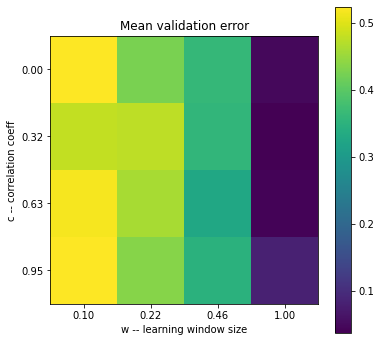

In [62]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
plt.imshow(min_val_error_matrix_mean)
plt.colorbar()
plt.title('Mean validation error')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([f'{w:0.2f}' for w in ws]);
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels([f'{c:0.2f}' for c in cs]);
ax.set_xlabel('w -- learning window size')
ax.set_ylabel('c -- correlation coeff')


Text(0, 0.5, 'c -- correlation coeff')

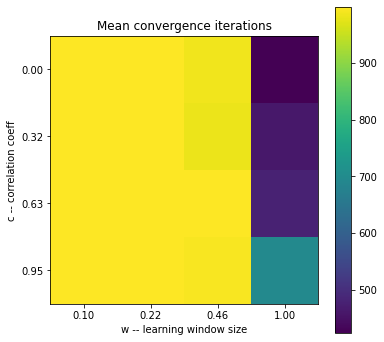

In [63]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
plt.imshow(min_n_iter_matrix_mean)
plt.colorbar()
plt.title('Mean convergence iterations')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([f'{w:0.2f}' for w in ws]);
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels([f'{c:0.2f}' for c in cs]);
ax.set_xlabel('w -- learning window size')
ax.set_ylabel('c -- correlation coeff')
